In [86]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.expected_conditions import visibility_of_element_located
import pandas as pd
from selenium.webdriver.support import expected_conditions as EC
import matplotlib.pyplot as plt
import seaborn as sns

## Set Up WebDriver and Chrome Options:

In [87]:
#from selenium.webdriver.chrome.service import Service
#service = Service(r"./chromedriver.exe")
#options = webdriver.ChromeOptions()
driver = webdriver.Chrome()

## Launch Chrome Browser:

In [88]:
driver.get('https://google.com')

In [89]:
print(driver.title)
print(driver.current_url)

Google
https://www.google.com/


## Handle Cookie Consent since everytime it was blocked because i had to press accept all:

Wait for and click the cookie consent button if it appears. This ensures that cookies do not block further interactions.

In [90]:
# Increase timeout duration to 5 seconds
wait = WebDriverWait(driver, 5)

# Wait for the cookie consent button to be present and click it
try:
    # Use a more general CSS selector for the "Accept All" button
    accept_button = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="L2AGLb"]')))
    accept_button.click()
except Exception as e:
    print(f"Error clicking 'Allow' button: {e}")

## Perform a Search Operation:

## Locate the search input box on the Google homepage using its XPath.
## Enter the search query into the search box.
## Submit the search (press ENTER or click the search button)

In [91]:
input_1 = driver.find_element(By.XPATH, '//*[@id="APjFqb"]') 
input_1.send_keys("Freinds IMDB episodes")
input_1.send_keys(Keys.ENTER)

## Accessing the first link found on google search by xpath

In [8]:
first_link_click = driver.find_element(By.XPATH, '//*[@id="kp-wp-tab-Season10"]/div[3]/div/div/div/div/div/div[1]/div/span/a/h3').click()


## Handle Cookie Consent on the Target Website:

In [9]:
# Wait for the cookie consent button to be present and click it
try:
    # Use a more general CSS selector for the "Accept All" button
    accept_button = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="__next"]/div/div/div[2]/div/button[2]')))
    accept_button.click()
except Exception as e:
    print(f"Error clicking 'Accept All' button: {e}")

## Extracting data from first page

In [10]:
# Wait for the episode tiles to be present
wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'div.sc-ccd6e31b-1.ggXjkj')))

# Locate all tiles containing episode information
all_tiles = driver.find_elements(By.CSS_SELECTOR, 'div.sc-ccd6e31b-1.ggXjkj')

# Extract episode titles
episode_titles = []
for tile in all_tiles:
    title_element = tile.find_element(By.CSS_SELECTOR, 'div.ipc-title__text')
    episode_title = title_element.text.split("∙")[1].strip()  # Adjust the split index if needed
    episode_titles.append(episode_title)

# Print the episode titles
print(episode_titles)

# Close the browser
driver.quit()


['The One Where Monica Gets a Roommate', 'The One with the Sonogram at the End', 'The One with the Thumb', 'The One with George Stephanopoulos', 'The One with the East German Laundry Detergent', 'The One with the Butt', 'The One with the Blackout', 'The One Where Nana Dies Twice', 'The One Where Underdog Gets Away', 'The One with the Monkey', 'The One with Mrs. Bing', 'The One with the Dozen Lasagnas', 'The One with the Boobies', 'The One with the Candy Hearts', 'The One with the Stoned Guy', 'The One with Two Parts: Part 1', 'The One with Two Parts: Part 2', 'The One with All the Poker', 'The One Where the Monkey Gets Away', 'The One with the Evil Orthodontist', 'The One with the Fake Monica', 'The One with the Ick Factor', 'The One with the Birth', 'The One Where Rachel Finds Out']


## Iterating over all the pages and also saving it to a CSV file

In [28]:

# Initialize the WebDriver
driver = webdriver.Chrome()

# Create a list to store all episode data
all_episodes = []

# Iterate over all 10 seasons
for season in range(1, 11):
    # Navigate to the IMDb page for the current season
    driver.get(f'https://www.imdb.com/title/tt0108778/episodes?season={season}')
    
    # Increase timeout duration to 20 seconds
    wait = WebDriverWait(driver, 20)
    
    # Wait for the episode tiles to be present
    wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'div.sc-ccd6e31b-1.ggXjkj')))
    
    # Locate all tiles containing episode information
    all_tiles = driver.find_elements(By.CSS_SELECTOR, 'div.sc-ccd6e31b-1.ggXjkj')
    
    # Extract episode titles and other details
    for tile in all_tiles:
        title_element = tile.find_element(By.CSS_SELECTOR, 'div.ipc-title__text')
        text = title_element.text.split("∙")
        title_text = text[1].strip()
        
        # Further split to extract season and episode number
        season_episode, episode_title = text[0].split('.')
        season_number = int(season_episode[1:])
        episode_number = int(episode_title[1:])

        # Extract additional information
        release_date_episode = tile.find_element(By.CSS_SELECTOR, 'span.sc-ccd6e31b-10.dYquTu').text.replace(",", "", 1)
        summary = tile.find_element(By.CSS_SELECTOR, 'div.ipc-html-content.ipc-html-content--base.ipc-html-content--display-inline').text
        
        rating_data = tile.find_element(By.CSS_SELECTOR, 'span.ipc-rating-star.ipc-rating-star--base.ipc-rating-star--imdb.ratingGroup--imdb-rating').text
        min_rating = float(rating_data.split("/")[0])
        max_rating = float(rating_data.split("/")[1].split("(")[0])
        number_of_review = rating_data.split("(")[-1][:-1]
        
        # Format the number of reviews
        number_of_review = int(number_of_review.replace("K", "000").replace("M", "000000").replace(".", ""))

        # Add to the list
        all_episodes.append({
            "season": season_number,
            "episode": episode_number,
            "release_date_episode": release_date_episode,
            "title": title_text,
            "summary": summary,
            "min_rating": min_rating,
            "max_rating": max_rating,
            "number_of_review": number_of_review
        })

# Convert the list to a DataFrame
df = pd.DataFrame(all_episodes)

# Print the DataFrame
print(df.head())

# Save the DataFrame to a CSV file
df.to_csv('friends_episodes_silenium.csv', index=False)

# Close the browser
driver.quit()


   season  episode release_date_episode  \
0       1        1     Thu Sep 22, 1994   
1       1        2     Thu Sep 29, 1994   
2       1        3      Thu Oct 6, 1994   
3       1        4     Thu Oct 13, 1994   
4       1        5     Thu Oct 20, 1994   

                                            title  \
0            The One Where Monica Gets a Roommate   
1            The One with the Sonogram at the End   
2                          The One with the Thumb   
3              The One with George Stephanopoulos   
4  The One with the East German Laundry Detergent   

                                             summary  min_rating  max_rating  \
0  Monica and the gang introduce Rachel to the "r...         8.1        10.0   
1  Ross finds out his ex-wife is pregnant. Rachel...         7.9        10.0   
2  Monica becomes irritated when everyone likes h...         8.0        10.0   
3  Joey and Chandler take Ross to a hockey game t...         7.9        10.0   
4  Eager to spend time

## Convert 'release_date_episode' to datetime format and some feature engineering

In [83]:

df['release_date_episode'] = pd.to_datetime(df['release_date_episode'])

# Extract year and month from release_date_episode for further analysis
df['year'] = df['release_date_episode'].dt.year
df['month'] = df['release_date_episode'].dt.month

# Convert 'saison' and 'episode' to numerical values if needed(eg: converts S1, E2 to 1,2 by using int(x[1:]) to the substring)
df['season'] = df['season'].apply(lambda x: int(x[1:]) if isinstance(x, str) else x)
df['episode'] = df['episode'].apply(lambda x: int(x[1:]) if isinstance(x, str) else x)

# Display basic information about the DataFrame after formatting
df.head()


,season,episode,release_date_episode,title,summary,min_rating,max_rating,number_of_review,year,month
0,1,1,1994-09-22,The One Where Monica Gets a Roommate,"Monica and the gang introduce Rachel to the ""r...",8.1,10.0,10000,1994,9
1,1,2,1994-09-29,The One with the Sonogram at the End,Ross finds out his ex-wife is pregnant. Rachel...,7.9,10.0,8000,1994,9
2,1,3,1994-10-06,The One with the Thumb,Monica becomes irritated when everyone likes h...,8.0,10.0,76000,1994,10
3,1,4,1994-10-13,The One with George Stephanopoulos,Joey and Chandler take Ross to a hockey game t...,7.9,10.0,73000,1994,10
4,1,5,1994-10-20,The One with the East German Laundry Detergent,"Eager to spend time with Rachel, Ross pretends...",8.3,10.0,73000,1994,10


# Creating a Setup with sqlalchemy and the default db sqlite to insert the Dataframes into SQL database 

In [29]:
from sqlalchemy import create_engine

# SQLAlchemy connection string
# You can replace 'sqlite:///friends_episodes.db' with your database connection string
engine = create_engine('sqlite:///friends_episodes.db')

# Write DataFrame to SQL database
df.to_sql('episodes', con=engine, index=False, if_exists='replace')

print("Data inserted successfully.")


Data inserted successfully.


##  Query to Finding episodes with most reviews

In [35]:
query = """
SELECT season, episode, title, number_of_review
FROM episodes
ORDER BY number_of_review DESC
LIMIT 5;
"""

most_reviewed_episode = pd.read_sql(query, con=engine)
print("Episode with the Most Reviews:")
print(most_reviewed_episode)


Episode with the Most Reviews:
   season  episode                        title  number_of_review
0       4       12     The One with the Embryos             97000
1       2       14  The One with the Prom Video             89000
2       1        7    The One with the Blackout             87000
3       8        9       The One with the Rumor             82000
4       1        3       The One with the Thumb             76000


## Query to calculate average rating of every season

In [36]:
query = """
SELECT season, AVG(min_rating) as average_rating
FROM episodes
GROUP BY season
ORDER BY season;
"""

average_rating_per_season = pd.read_sql(query, con=engine)
print("Average Rating for Each Season:")
print(average_rating_per_season)


Average Rating for Each Season:
   season  average_rating
0       1        8.137500
1       2        8.283333
2       3        8.252000
3       4        8.320833
4       5        8.479167
5       6        8.316000
6       7        8.250000
7       8        8.287500
8       9        8.108696
9      10        8.482353


## Visualizing the results on a bar chart

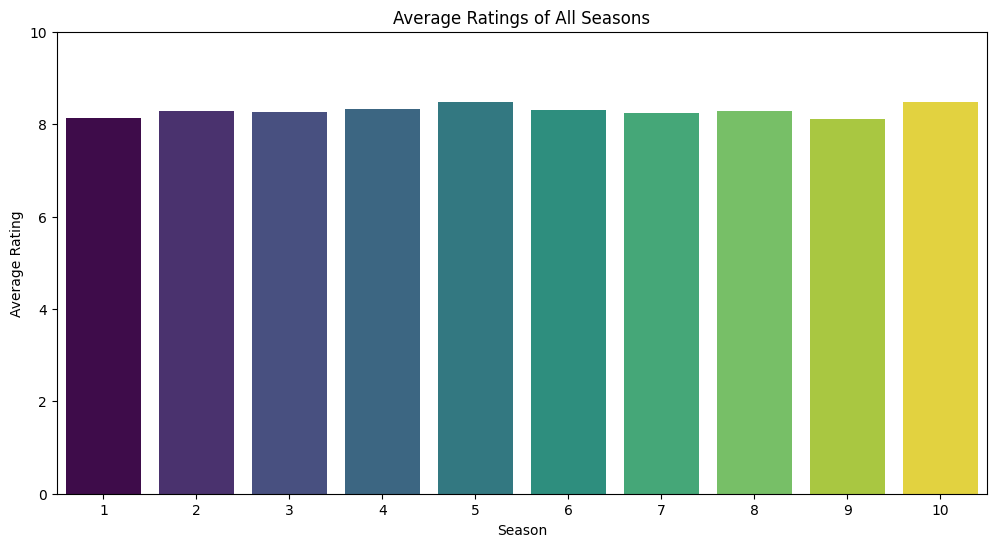

In [54]:
# Plot the average ratings of all seasons
plt.figure(figsize=(12, 6))
sns.barplot(data=average_rating_per_season, x='season', y='average_rating',hue = "season",legend = False, palette='viridis')
plt.title('Average Ratings of All Seasons')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.ylim(0, 10)
plt.show()

## Select episodes with seasons with ratings less than 7 to get an intuitive idea of what episodes didn't perform well 

Seasons with Average Rating Less than 4:
   season  episode                              title  min_rating  max_rating
0       4       21        The One with the Invitation         6.9        10.0
1       6       20  The One with Mac and C.H.E.E.S.E.         7.1        10.0
2       7       21              The One with the Vows         7.2        10.0
3       8       19      The One with Joey's Interview         7.2        10.0
4       9       10    The One with Christmas in Tulsa         7.2        10.0


<BarContainer object of 5 artists>

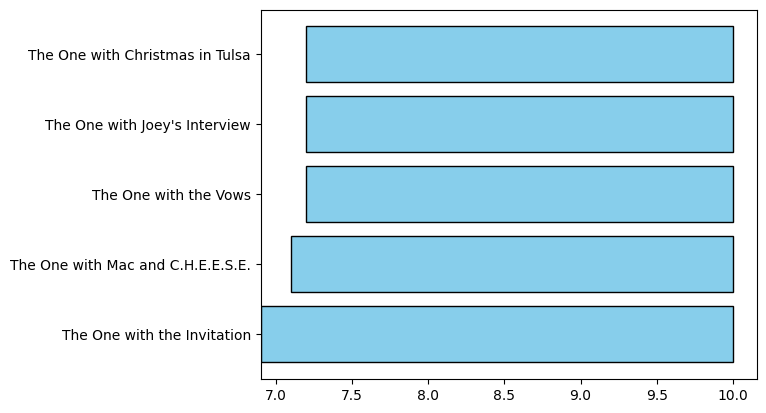

In [79]:

query_seasons = """
SELECT season,episode,title,min_rating,max_rating
FROM episodes
where min_rating < 7.5;
"""
seasons_with_low_ratings = pd.read_sql(query_seasons, con=engine)

# Print the seasons with average rating less than 4
print("Seasons with Average Rating Less than 4:")
print(seasons_with_low_ratings)


#Ploting the results

plt.barh(seasons_with_low_ratings['title'], seasons_with_low_ratings['max_rating'] - seasons_with_low_ratings['min_rating'], 
         left=seasons_with_low_ratings['min_rating'], color='skyblue', edgecolor='black')

## Top Episodes and Their Characteristics for each season to Identify common traits among top-rated episodes can provide insights into what makes an episode particularly appealing to viewers.

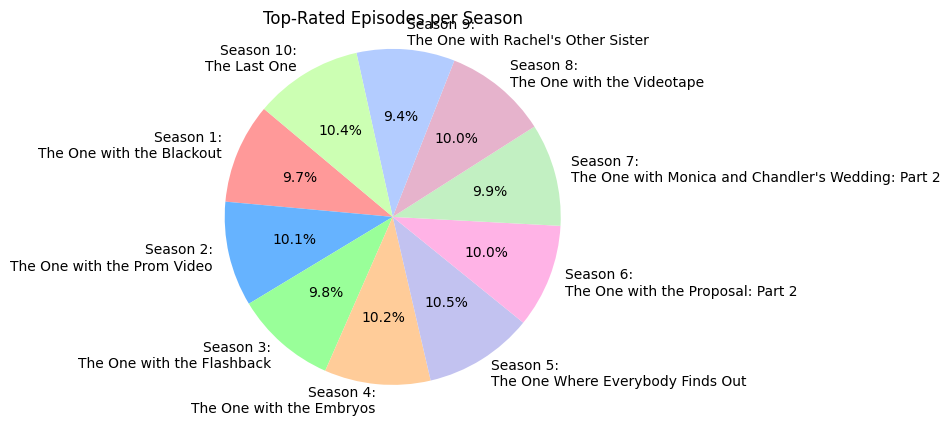

,season,episode,title,max_rating
0,1,7,The One with the Blackout,8.9
1,2,14,The One with the Prom Video,9.3
2,3,6,The One with the Flashback,9.0
3,4,12,The One with the Embryos,9.4
4,5,14,The One Where Everybody Finds Out,9.7
5,6,25,The One with the Proposal: Part 2,9.2
6,7,24,The One with Monica and Chandler's Wedding: Pa...,9.1
7,8,4,The One with the Videotape,9.2
8,9,8,The One with Rachel's Other Sister,8.7
9,10,17,The Last One,9.6


In [70]:

# Execute the SQL query to get top-rated episodes per season
query = """
SELECT season, episode, title, MAX(min_rating) as max_rating   
FROM episodes
GROUP BY season
ORDER BY season;
"""

top_episodes_per_season = pd.read_sql(query, con=engine)

# Format labels to include both the title and the season
labels = [f"Season {row['season']}:\n{row['title']}" for index, row in top_episodes_per_season.iterrows()]
sizes = top_episodes_per_season['max_rating']

# Custom colors for the pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2','#e6b3cc','#b3ccff','#ccffb3']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top-Rated Episodes per Season')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
top_episodes_per_season

# Axis of analysis
## Common Themes in Top-Rated Episodes

Significant Life Events:

Many top-rated episodes revolve around key life events and milestones, such as weddings and major romantic developments. This suggests that episodes dealing with these significant moments tend to be more impactful and memorable.
     - "The One Where Everybody Finds Out" involves a major revelation and pivotal plot twist where the rest of the group discovers Monica and      Chandler's relationship.
     - "The Last One" is the series finale, which is a highly anticipated and emotional conclusion to the series.
    - "The One with the Embryos" features a memorable and competitive quiz between the friends that showcases their deep bond and humorous side.

Humor and Heartfelt Moments: 

Episodes with a mix of humor and heartfelt moments or emotional resolutions often rank higher in ratings. For instance, "The One with the Prom Video" combines nostalgia and emotional depth, leading to high viewer satisfaction.

## Conclusion : Les meilleurs épisodes coïncident souvent avec des arcs narratifs et des développements importants des personnages. Par exemple, les jalons de la relation entre Monica et Chandler sont très appréciés des fans, ce qui indique que les épisodes qui font progresser les intrigues clés des personnages sont très valorisés.

## Les épisodes qui impliquent des événements spéciaux, tels que des mariages et des révélations majeures, ou qui se terminent sur un cliffhanger ou un tournant majeur, ont tendance à obtenir de meilleures notes. Cela pourrait suggérer que les téléspectateurs apprécient les épisodes qui offrent une progression narrative substantielle ou un impact émotionnel important.
